In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Netflix Shows Analysis
Source: Kaggle Dataset

In [2]:
netflix_data = pd.read_csv("netflix_titles.csv")
netflix_data['date_added'] = pd.to_datetime(netflix_data['date_added'], infer_datetime_format=True)

In [3]:
netflix_data.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [4]:
# date_added columns datatype changed from object to datetime64 for extracting months and dates for analysis.
netflix_data.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

In [5]:
netflix_data.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [6]:
# Extract month from date_added column.
netflix_data["date_added_month"]=netflix_data["date_added"].dt.month.fillna(0)

In [7]:
# Extract date from date_added column.
netflix_data["date_added_day"]=netflix_data["date_added"].dt.day.fillna(0)

# Data Wrangling
Created a copy of dataset as a netflix_cp.
NaN values filled as a "No Data" in Country, Director and Cast columns.
Few rows entirely dropped.

In [8]:
netflix_cp = netflix_data.copy()

In [9]:
netflix_cp["country"].fillna("No Data", inplace=True)
netflix_cp["director"].fillna("No Data", inplace=True)
netflix_cp["cast"].fillna("No Data", inplace=True)

In [10]:
netflix_cp["date_added"].fillna(netflix_cp["date_added"].mode()[0], inplace=True)

In [11]:
netflix_cp.dropna(subset=["rating"], inplace=True)
netflix_cp.dropna(subset=["duration"], inplace=True)

In [12]:
netflix_cp.isna().sum()

show_id             0
type                0
title               0
director            0
cast                0
country             0
date_added          0
release_year        0
rating              0
duration            0
listed_in           0
description         0
date_added_month    0
date_added_day      0
dtype: int64

In [13]:
netflix_cp.sort_values(by="release_year").head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_month,date_added_day
4250,s4251,TV Show,Pioneers: First Women Filmmakers*,No Data,No Data,No Data,2018-12-30,1925,TV-14,1 Season,TV Shows,This collection restores films from women who ...,12.0,30.0
7790,s7791,Movie,Prelude to War,Frank Capra,No Data,United States,2017-03-31,1942,TV-14,52 min,"Classic Movies, Documentaries",Frank Capra's documentary chronicles the rise ...,3.0,31.0
8205,s8206,Movie,The Battle of Midway,John Ford,"Henry Fonda, Jane Darwell",United States,2017-03-31,1942,TV-14,18 min,"Classic Movies, Documentaries",Director John Ford captures combat footage of ...,3.0,31.0


In [14]:
netflix_cp["rating"].value_counts().to_frame().transpose()

,TV-MA,TV-14,TV-PG,R,PG-13,TV-Y7,TV-Y,PG,TV-G,NR,G,TV-Y7-FV,NC-17,UR
rating,3207,2160,863,799,490,334,307,287,220,80,41,6,3,3


In [15]:
netflix_cp["release_year"].describe().to_frame().transpose()

,count,mean,std,min,25%,50%,75%,max
release_year,8800.0,2014.179886,8.822583,1925.0,2013.0,2017.0,2019.0,2021.0


In [16]:
# Country column data munging
netflix_cp['country'].str.split(",")

0       [United States]
1        [South Africa]
2             [No Data]
3             [No Data]
4               [India]
             ...       
8802    [United States]
8803          [No Data]
8804    [United States]
8805    [United States]
8806            [India]
Name: country, Length: 8800, dtype: object

In [17]:
netflix_cp["country"].value_counts().head(10).to_frame().transpose()

,United States,India,No Data,United Kingdom,Japan,South Korea,Canada,Spain,France,Mexico
country,2815,972,830,419,244,199,181,145,124,110


In [18]:
# Listed_in column data munging
listedin_split = netflix_cp['listed_in'].str.split(",")

In [19]:
genre_data = netflix_cp["listed_in"].value_counts().head(10).reset_index()

In [20]:
genre=pd.DataFrame(genre_data)

In [21]:
genre.rename(columns={"index":"Genre", "listed_in":"Count"}, inplace=True)

#  Netflix Data Visualization

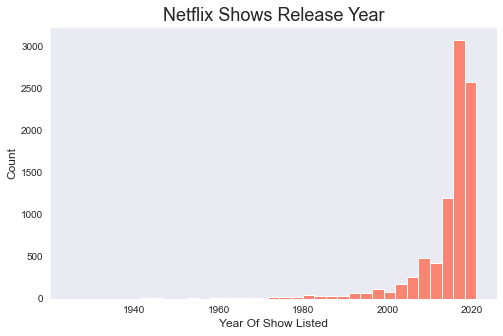

In [22]:
plt.figure(figsize=(8,5))
sns.set_style('dark')
sns.histplot(data=netflix_data, x="release_year", color="tomato", bins=35)
plt.xlabel( "Year Of Show Listed", size = 12 )
plt.ylabel( "Count", size = 12 )
plt.title( "Netflix Shows Release Year", size = 18 )
plt.show()

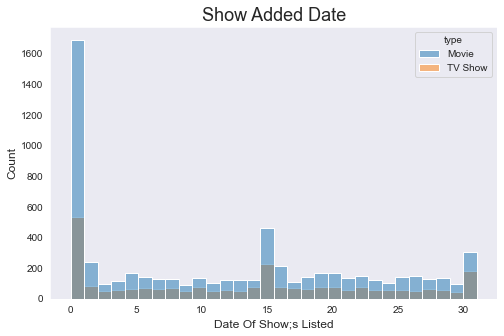

In [23]:
plt.figure(figsize=(8,5))
sns.set_style('dark')
sns.histplot(data=netflix_data, x="date_added_day", hue="type",bins=30)
plt.xlabel( "Date Of Show;s Listed", size = 12 )
plt.ylabel( "Count", size = 12 )
plt.title( "Show Added Date", size = 18 )
plt.show()

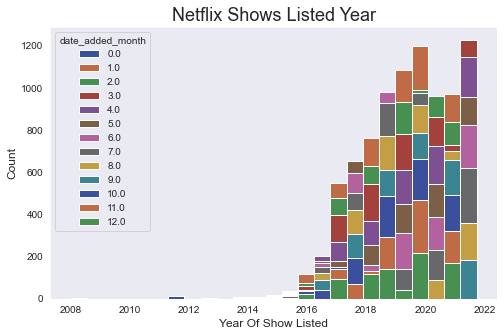

In [24]:
plt.figure(figsize=(8,5))
sns.set_style('dark')
sns.histplot(data=netflix_data, x="date_added", hue="date_added_month", palette="dark",multiple="stack",bins=25)
plt.xlabel( "Year Of Show Listed", size = 12 )
plt.ylabel( "Count", size = 12 )
plt.title( "Netflix Shows Listed Year", size = 18 )
plt.show()

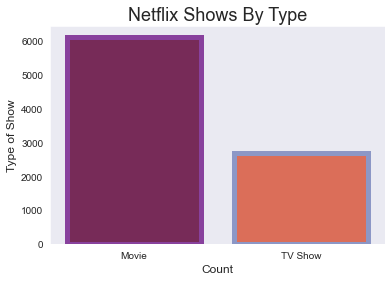

In [25]:
sns.set_style('dark')
sns.countplot(data=netflix_cp, x="type", linewidth=5, palette="rocket", edgecolor=sns.color_palette("BuPu_r", 3))
plt.xlabel( "Count" , size = 12 )
plt.ylabel( "Type of Show" , size = 12 )
plt.title( "Netflix Shows By Type", size = 18 )
plt.show()

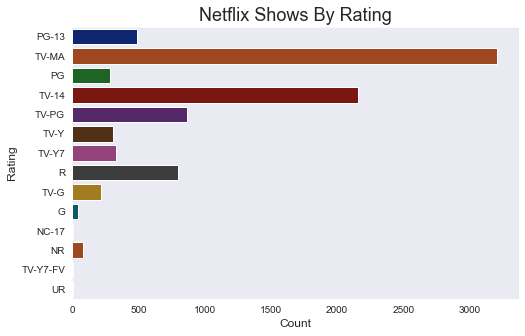

In [26]:
sns.set_style('dark')
plt.figure(figsize=(8,5))
sns.countplot(data=netflix_cp, y="rating", palette="dark")
plt.xlabel( "Count" , size = 12 )
plt.ylabel( "Rating" , size = 12 )
plt.title( "Netflix Shows By Rating", size = 18 )
plt.show()

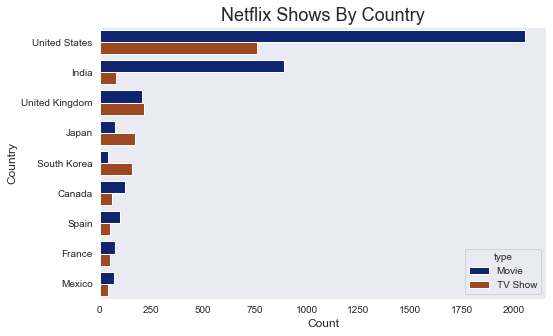

In [27]:
plt.figure(figsize=(8,5))
sns.set_style('dark')
country_top=['United States','India', 'United Kingdom','Japan','South Korea','Canada', 'Spain', 'France', 'Mexico']
sns.countplot(data=netflix_cp, y="country", palette="dark", order= country_top, hue='type')
plt.xlabel( "Count", size = 12 )
plt.ylabel( "Country", size = 12 )
plt.title( "Netflix Shows By Country", size = 18 )
plt.show()

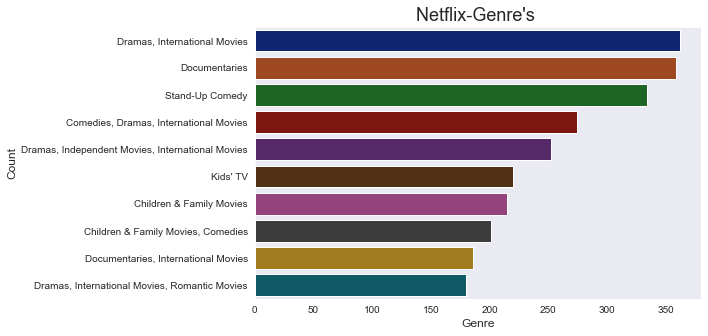

In [28]:
plt.figure(figsize=(8,5))
sns.set_style('dark')
sns.barplot(data=genre, y="Genre", x="Count", palette="dark")
plt.xlabel( "Genre" , size = 12 )
plt.ylabel( "Count" , size = 12 )
plt.title( "Netflix-Genre's " , size = 18 )
plt.show()